In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as snsm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [3]:
os.chdir('../../Beergression_Data_and_misc/Data/')

# Compare Brewery Score with Values Derived from Style Categories

In [4]:
brews_df = pd.read_pickle('Clean_Brewery_Data')
style_df = pd.read_pickle('Clean_Beer_Style_Data')
style_df = pd.concat([brews_df, style_df],axis=1,join='inner')

In [5]:
style_df.drop(['Num_Beers','Country', 'Total_Beer_Reviews',
               'Total_Beer_Ratings','Num_Brewery_Reviews',
               'Num_Brewery_Ratings','Eatery','Beer_to_go']
               ,axis=1,inplace=True)

### Taking a look at Correlations

In [6]:
corr_style_df = style_df.corr()

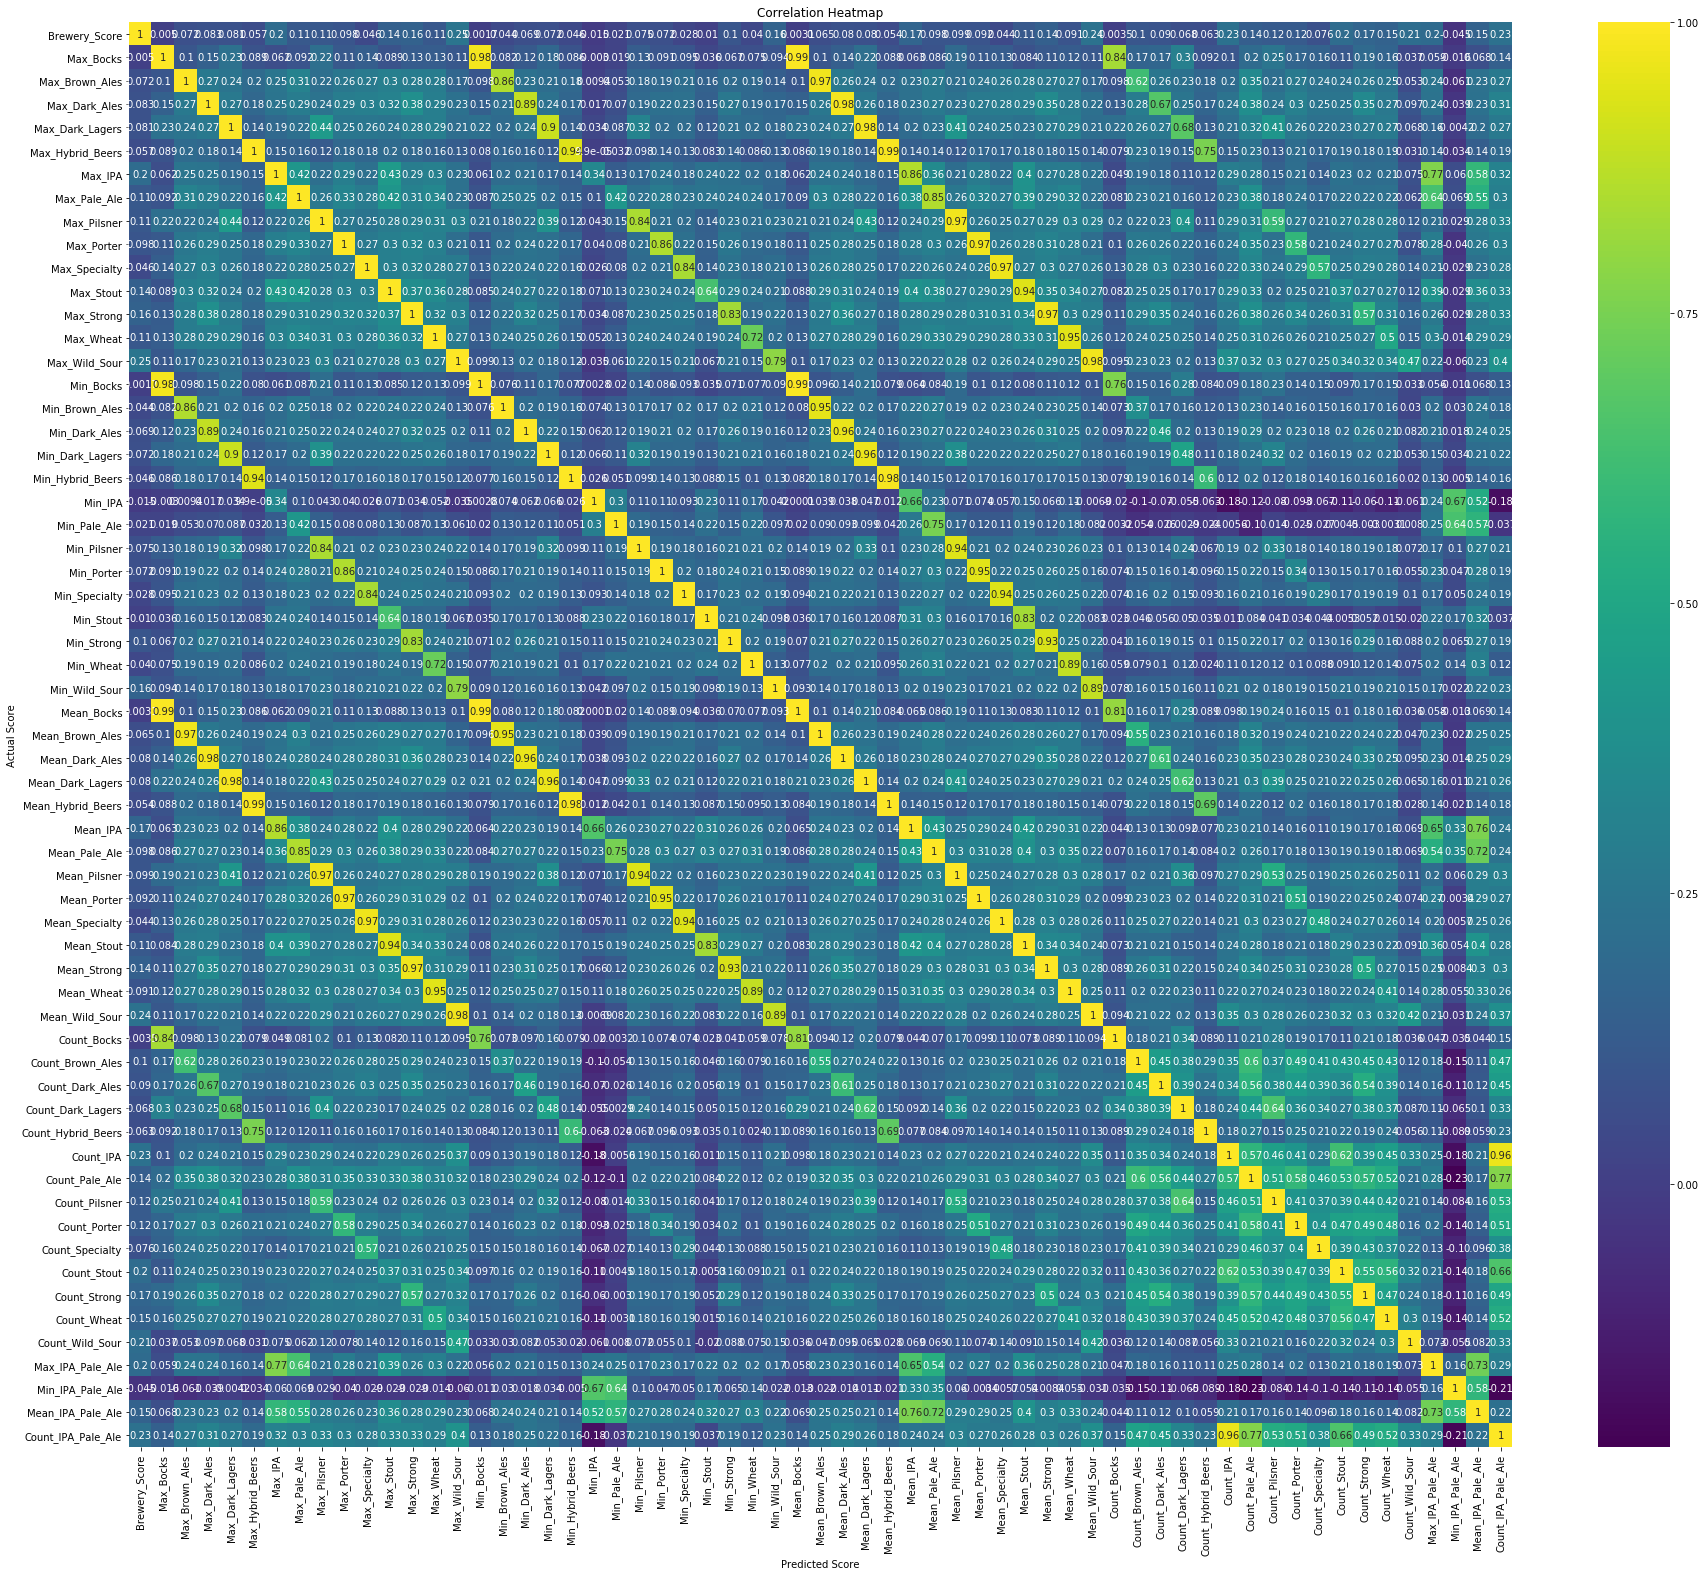

In [8]:
corr_style_df = style_df.corr()

plt.figure(figsize=(26,22))
sns.heatmap(corr_style_df,cmap='viridis',annot=True)


plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.title('Correlation Heatmap')

plt.savefig('Full_Correlation_Heatmap')

plt.tight_layout();

Note that many of the perfect correlations are due to the fact that breweries specialize in different beers, i.e. breweries that make sours don't make IPAs and vice versa.
Also, this all looks a little too busy.  
Let's reduce the number of rows and columns by filtering out any values with a correlation weaker than `abs(0.1)` and take another look.

In [9]:
reduced_corr_style_df = corr_style_df[abs(corr_style_df.Brewery_Score) > .1]
reduced_corr_style_df = reduced_corr_style_df.transpose()
reduced_corr_style_df = reduced_corr_style_df[abs(corr_style_df.Brewery_Score) > .1]

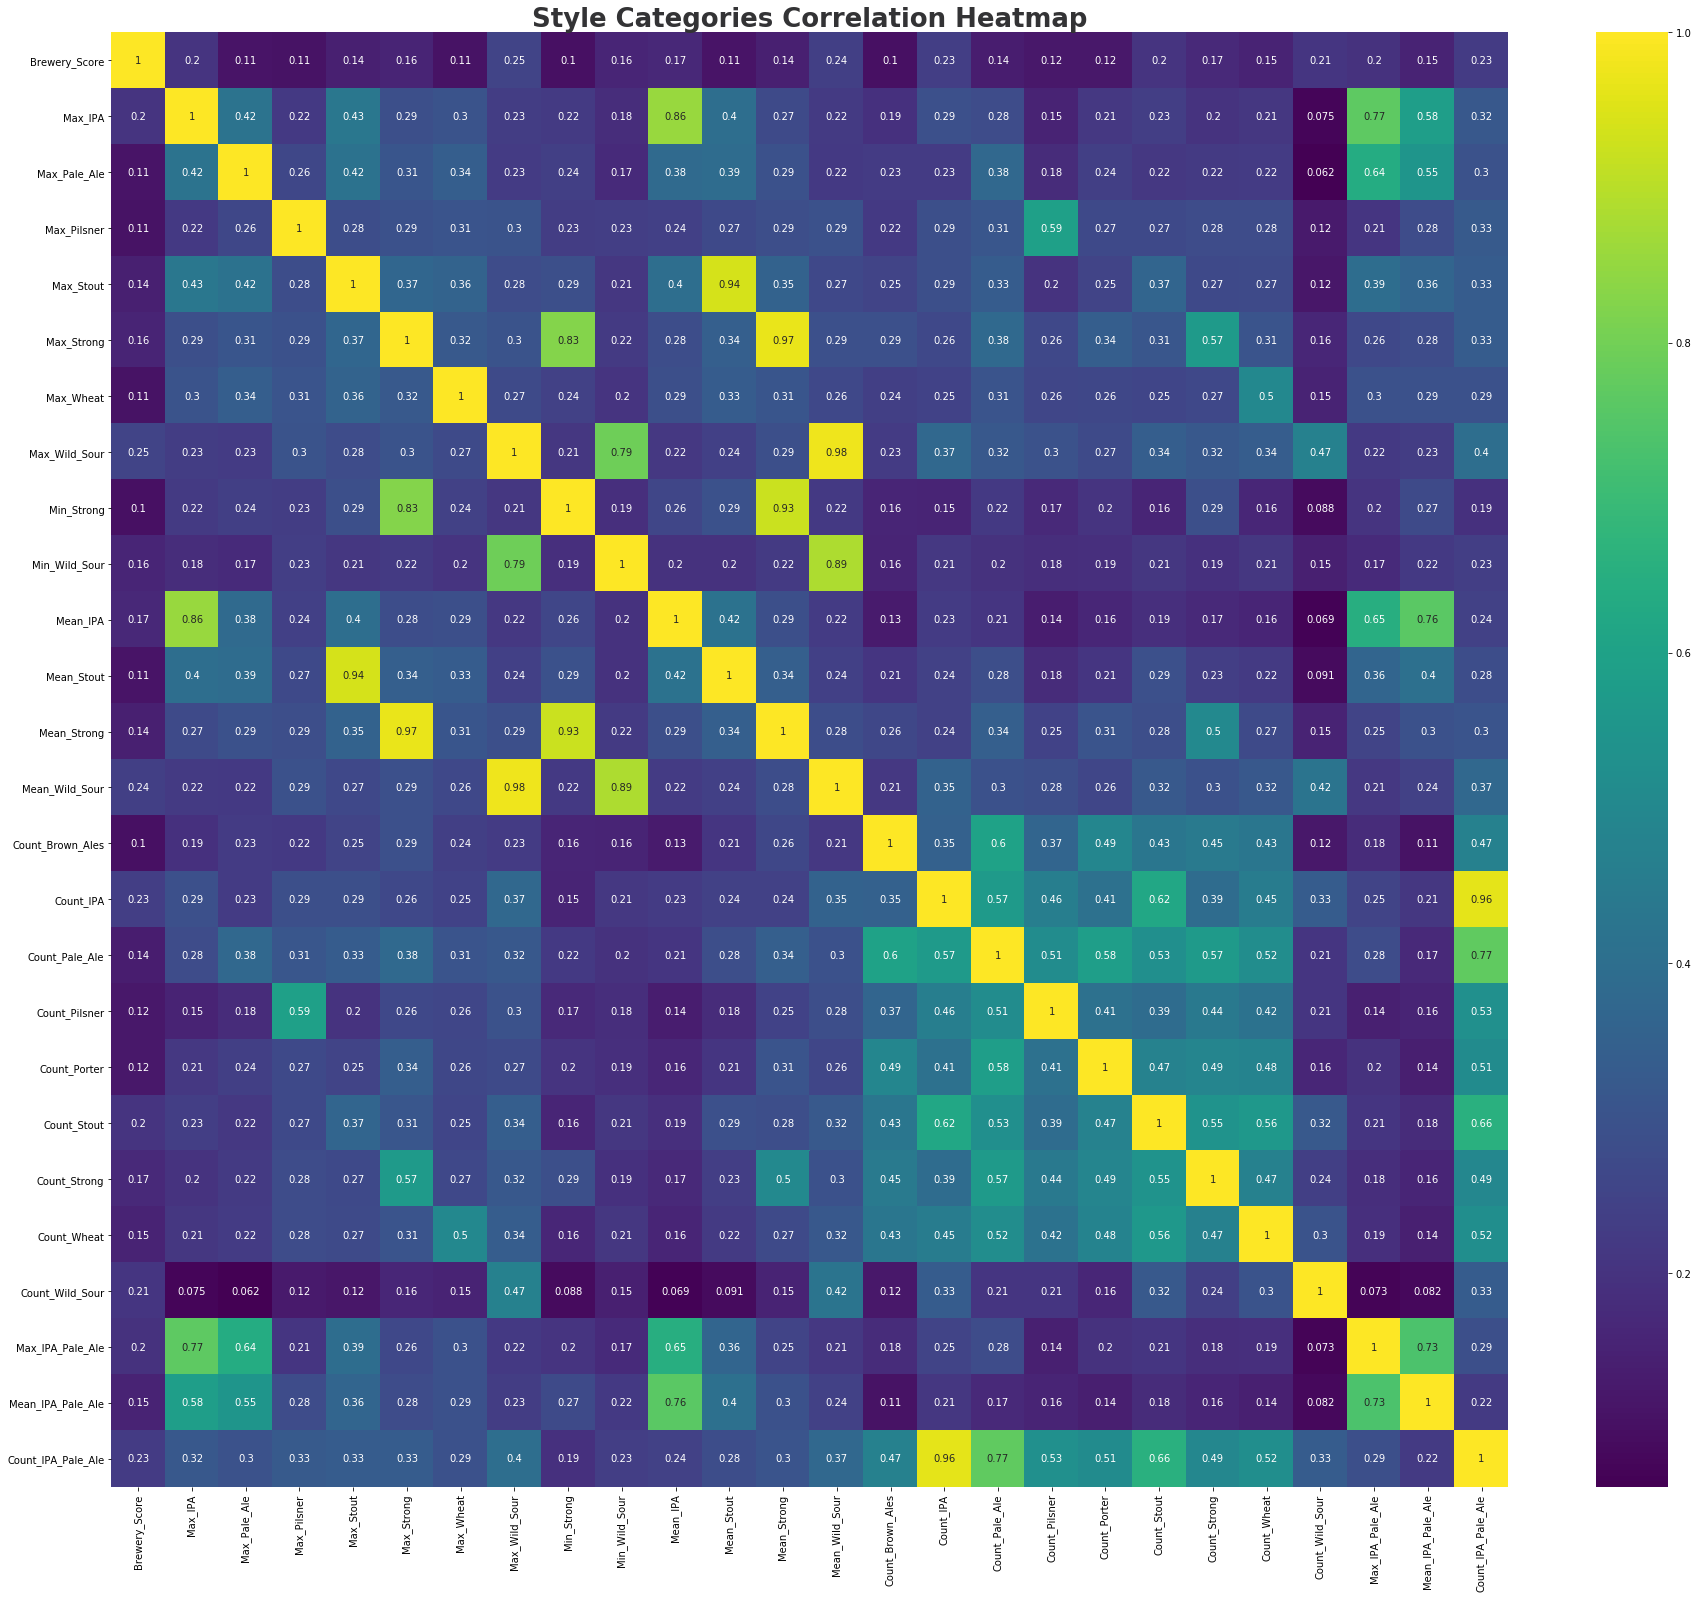

In [14]:
plt.figure(figsize=(26,22))
sns.heatmap(reduced_corr_style_df,cmap='viridis',annot=True)
plt.tight_layout()

plt.title('Style Categories Correlation Heatmap',fontsize=26,weight='bold', color='#333335')

plt.savefig('Reduced_Correlation_Heatmap');

Again, ignore the perfect correlations. Look now only at the how the brewery score correlates to various values.

### Pairplots of correlations stronger than `abs(0.2)`

### Let's reduce a bit more

In [11]:
reduced_corr_df2 = corr_style_df[abs(corr_style_df.Brewery_Score) > .2]
reduced_corr_df2 = reduced_corr_df2.transpose()
cols = list(reduced_corr_df2.columns)
reduced_df = style_df[cols]

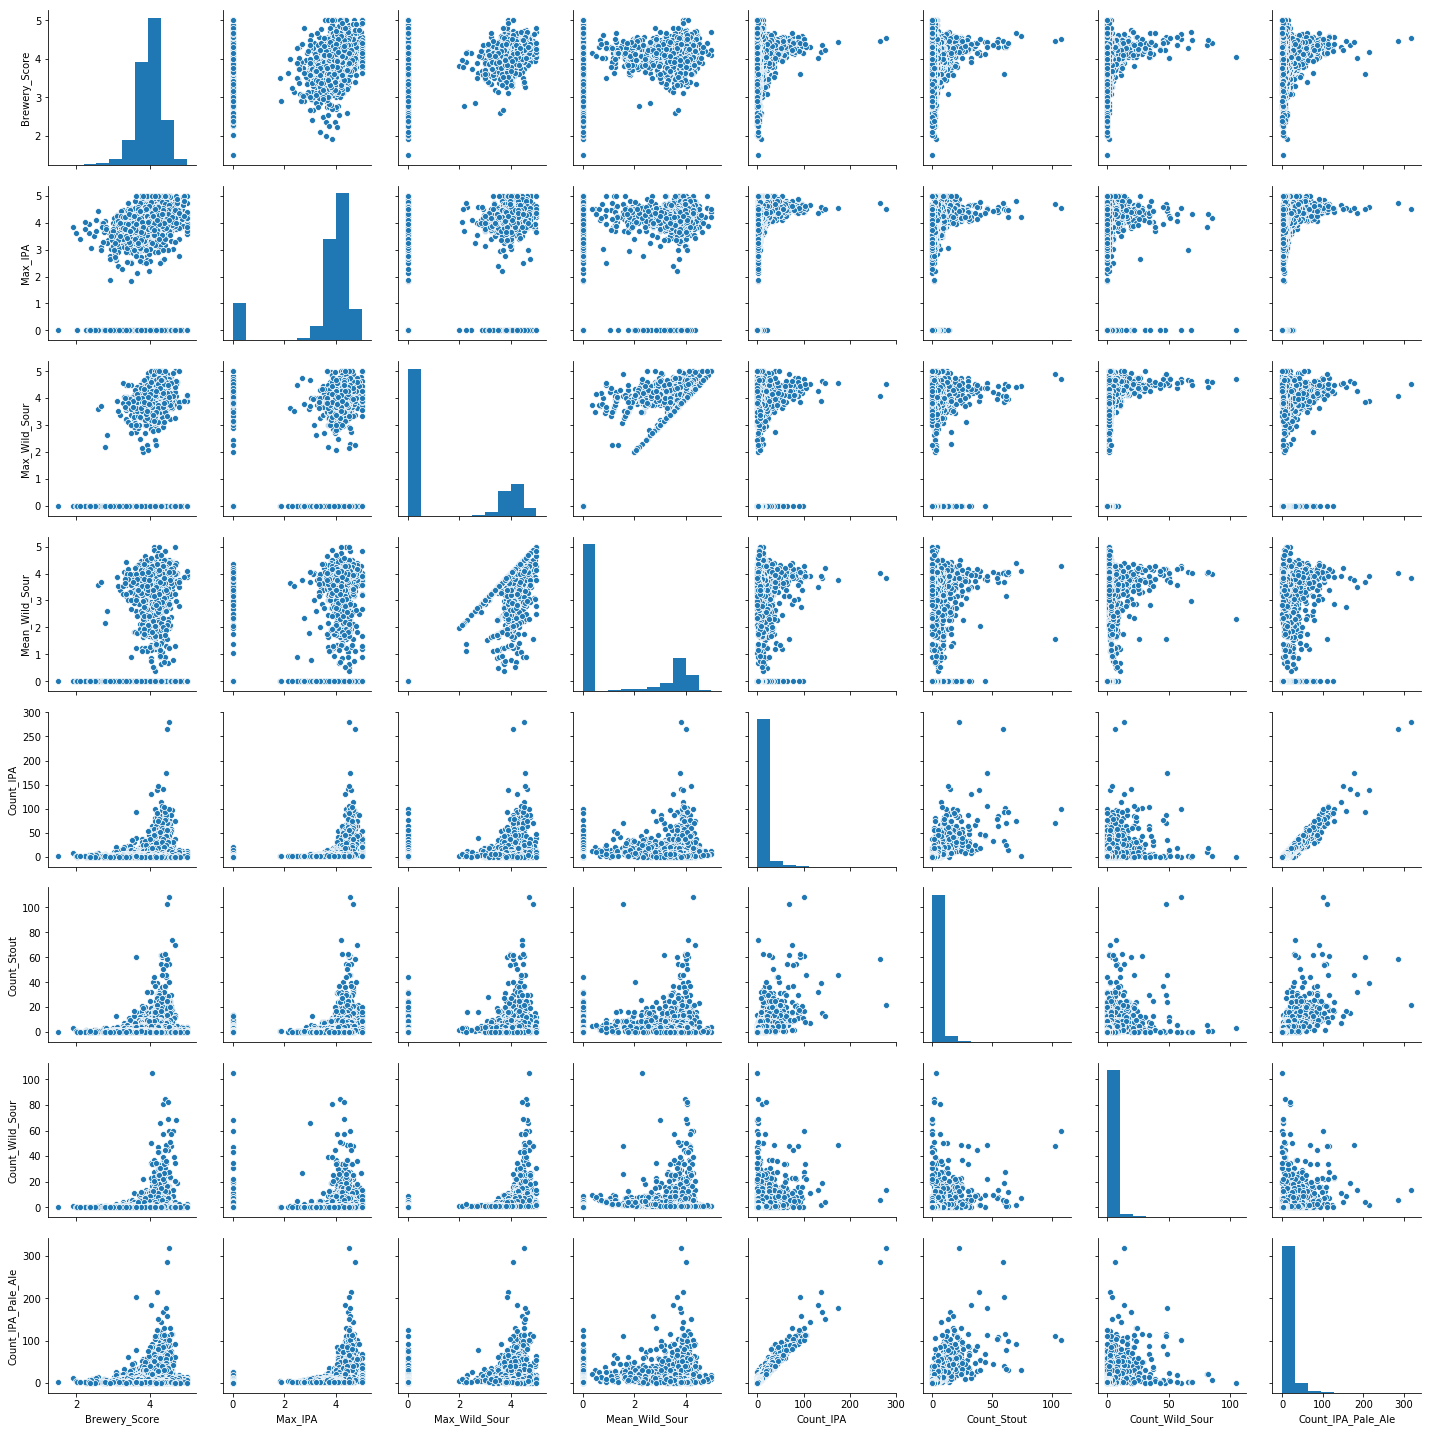

In [12]:
sns.pairplot(reduced_df);

### Visualizing without columns derived from aggregating styles info
Upon visualizing the correlations including columns derived from aggregating styles it appears that the slight correlations that existed were  perhaps more random/coincidental and not as trustworthy as would be hoped.  
Below I've plotted heatmaps and pairplots for all data not included in columns derived from aggregating styles.

In [35]:
cols = ['Brewery_Score', 'Beer_to_go', 'Country', 
        'Eatery', 'Num_Beers','Num_Brewery_Ratings',
        'Num_Brewery_Reviews', 'Total_Beer_Ratings',
       'Total_Beer_Reviews']

In [36]:
beer_df = pd.read_pickle('Clean_Beer_Data')
beer_df.drop(['Total_Beer_Ratings'],inplace=True,axis=1)
brews_df = pd.read_pickle('Clean_Brewery_Data')
brews_df = brews_df[cols]
df = pd.concat([brews_df, beer_df],axis=1,join='inner',sort=False)

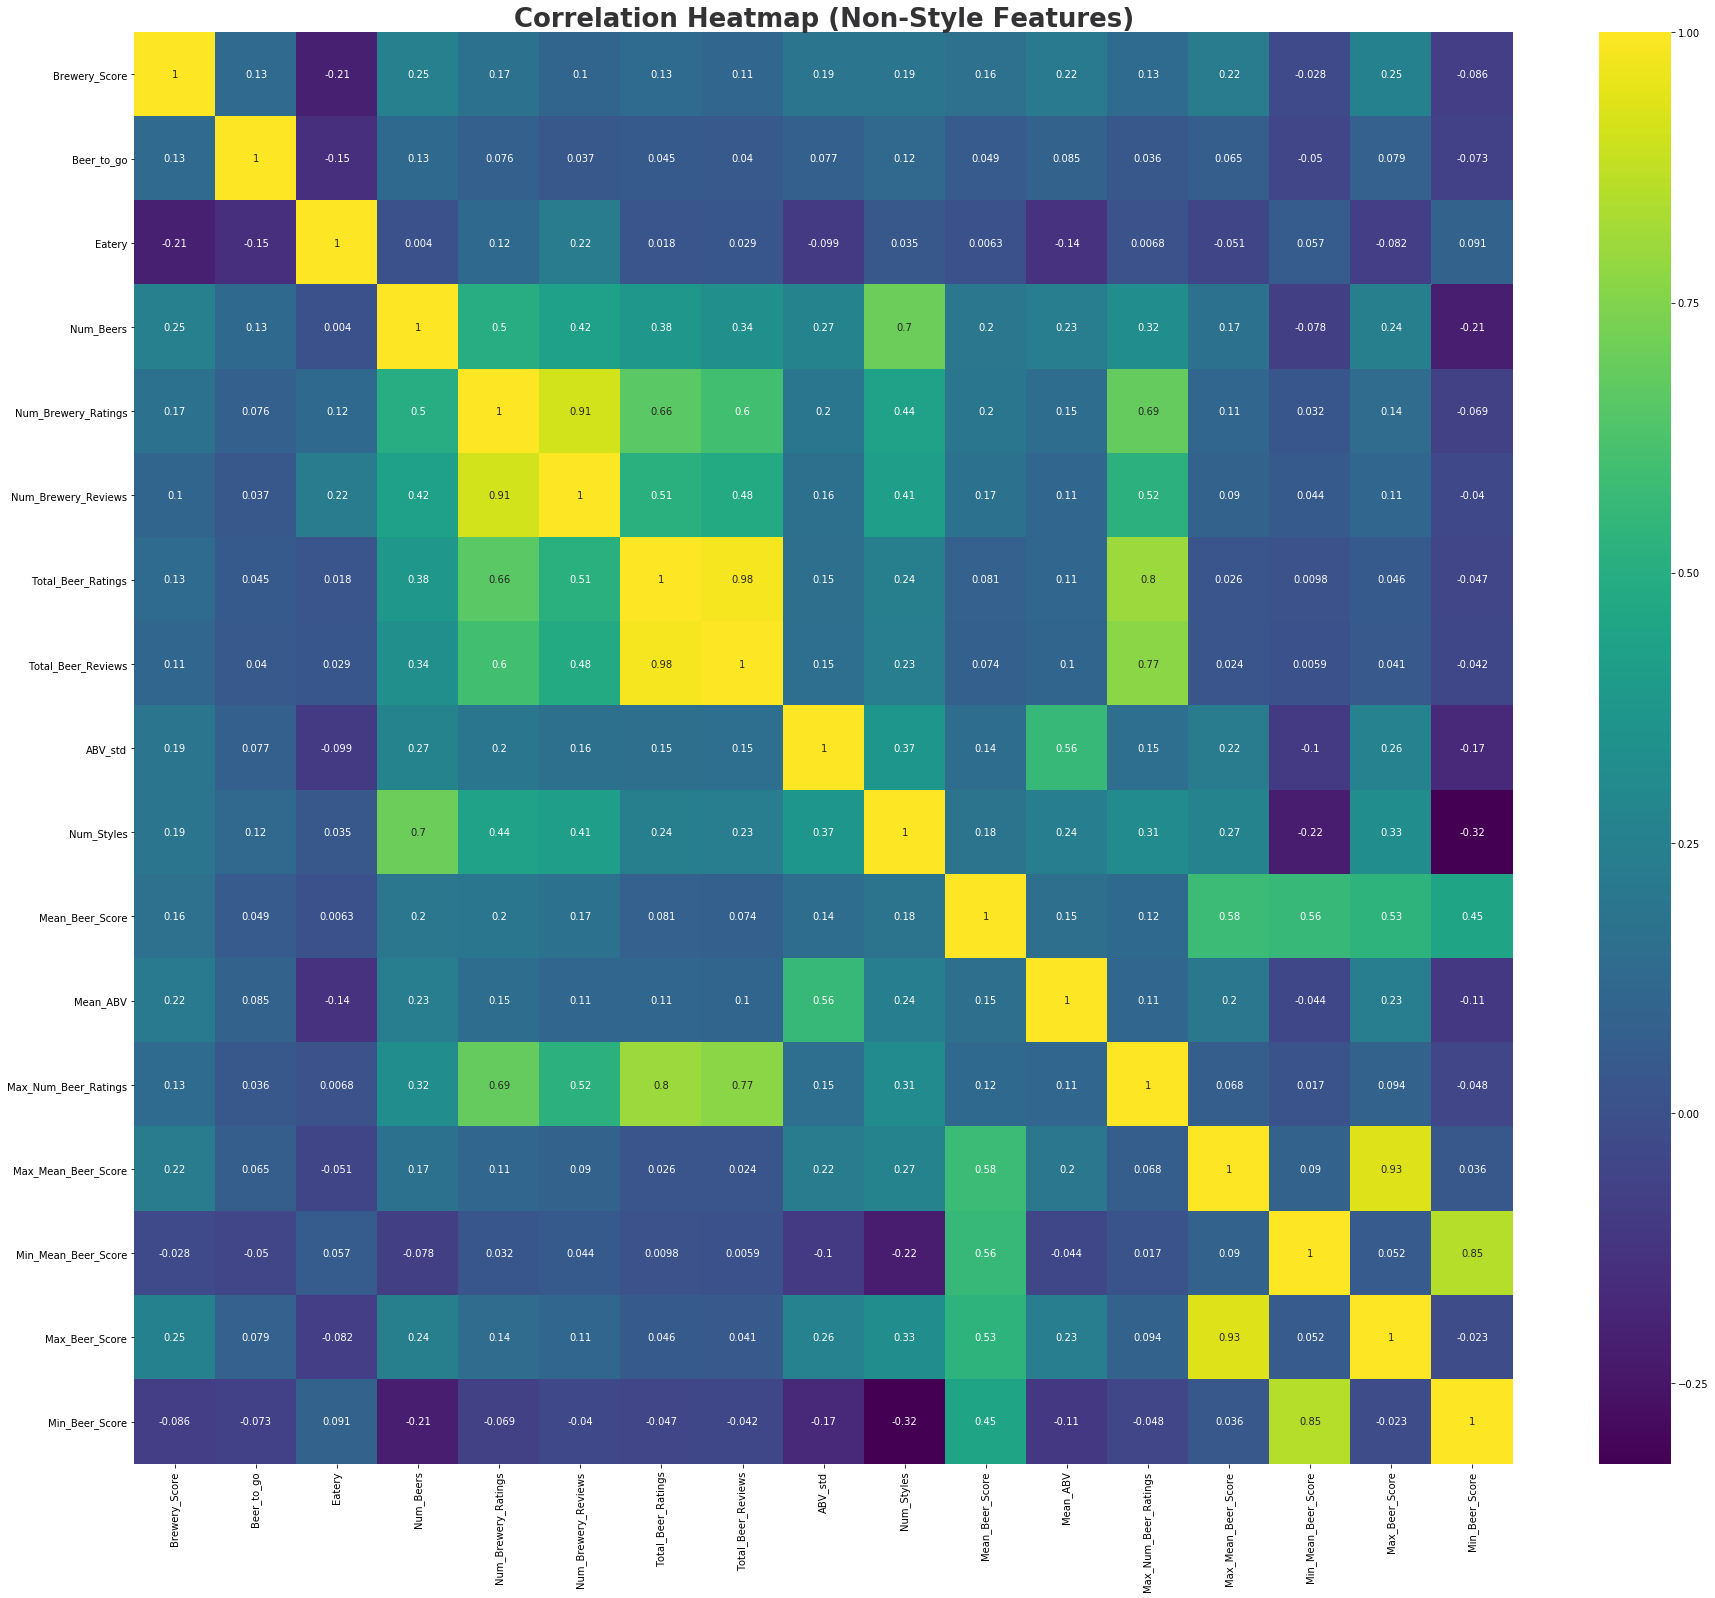

In [39]:
corr_df = df.corr()

plt.figure(figsize=(26,22))
sns.heatmap(corr_df,cmap='viridis',annot=True)
plt.tight_layout()

plt.title('Correlation Heatmap (Non-Style Features)',
         fontsize=26,weight='bold', color='#333335')

plt.savefig('Corr_Heatmap_Non-Style-Cat');

### Outputting some working data

In [17]:
beer_df = pd.read_pickle('Clean_Beer_Data')
beer_df.drop(['Total_Beer_Ratings'],inplace=True,axis=1)
brews_df = pd.read_pickle('Clean_Brewery_Data')
brews_df.drop(['Town','State','Country'],inplace=True,axis=1)
style_df = pd.read_pickle('Clean_Beer_Style_Data')
df = pd.concat([brews_df, style_df, beer_df],axis=1,join='inner')

pd.to_pickle(df,'All_Data')

In [18]:
df = df[['Brewery_Score','Eatery', 'Num_Brewery_Ratings', 'Num_Brewery_Reviews', 
        'Total_Beer_Ratings', 'Total_Beer_Reviews', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score']]

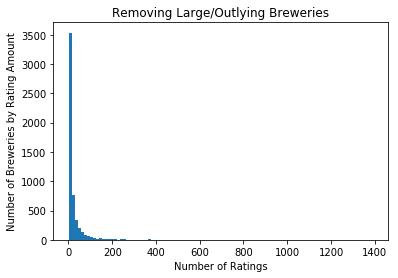

In [45]:

plt.title('Removing Large/Outlying Breweries')
plt.ylabel('Number of Breweries by Rating Amount')
plt.xlabel('Number of Ratings')
plt.hist(df.Num_Brewery_Ratings,bins=100);

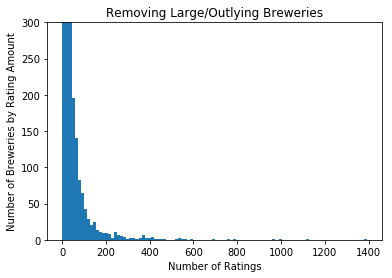

In [44]:
plt.ylim(0,300)
plt.title('Removing Large/Outlying Breweries')
plt.ylabel('Number of Breweries by Rating Amount')
plt.xlabel('Number of Ratings')
plt.hist(df.Num_Brewery_Ratings,bins=100);